## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [10]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [11]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [12]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test

In [13]:
x_train = x_train[:5000]
y_train = y_train[:5000]

x_test = x_test[:1000]
y_test = y_test[:1000]

In [14]:
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()



In [16]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [17]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 5000 samples, validate on 1000 samples
Epoch 1/500
5000/5000 [==============================] - 1s 143us/step - loss: 2.2060 - accuracy: 0.1868 - val_loss: 2.0650 - val_accuracy: 0.2500
Epoch 2/500
5000/5000 [==============================] - 1s 127us/step - loss: 1.9629 - accuracy: 0.2932 - val_loss: 1.9587 - val_accuracy: 0.2720
Epoch 3/500
5000/5000 [==============================] - 1s 129us/step - loss: 1.8548 - accuracy: 0.3394 - val_loss: 1.9448 - val_accuracy: 0.3150
Epoch 4/500
5000/5000 [==============================] - 1s 125us/step - loss: 1.8152 - accuracy: 0.3540 - val_loss: 1.8244 - val_accuracy: 0.3470
Epoch 5/500
5000/5000 [==============================] - 1s 130us/step - loss: 1.7638 - accuracy: 0.3710 - val_loss: 1.8423 - val_accuracy: 0.3340
Epoch 6/500
5000/5000 [==============================] - 1s 126us/step - loss: 1.7082 - accuracy: 0.3990 - val_loss: 1.7656 - val_accuracy: 0.3750
Epoch 7/500
5000/5000 [==============================] - 1s 125us/step

5000/5000 [==============================] - 1s 118us/step - loss: 0.4506 - accuracy: 0.8534 - val_loss: 2.3599 - val_accuracy: 0.3940
Epoch 57/500
5000/5000 [==============================] - 1s 115us/step - loss: 0.4591 - accuracy: 0.8516 - val_loss: 2.2892 - val_accuracy: 0.4130
Epoch 58/500
5000/5000 [==============================] - 1s 116us/step - loss: 0.4591 - accuracy: 0.8544 - val_loss: 2.0536 - val_accuracy: 0.4280
Epoch 59/500
5000/5000 [==============================] - 1s 115us/step - loss: 0.4287 - accuracy: 0.8724 - val_loss: 2.1623 - val_accuracy: 0.3900
Epoch 60/500
5000/5000 [==============================] - 1s 114us/step - loss: 0.3302 - accuracy: 0.9060 - val_loss: 2.2987 - val_accuracy: 0.3910
Epoch 61/500
5000/5000 [==============================] - 1s 116us/step - loss: 0.3672 - accuracy: 0.8880 - val_loss: 2.5640 - val_accuracy: 0.3790
Epoch 62/500
5000/5000 [==============================] - 1s 117us/step - loss: 0.3880 - accuracy: 0.8796 - val_loss: 2.7637 

5000/5000 [==============================] - 1s 117us/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 3.2376 - val_accuracy: 0.4340
Epoch 112/500
5000/5000 [==============================] - 1s 117us/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 3.2409 - val_accuracy: 0.4230
Epoch 113/500
5000/5000 [==============================] - 1s 115us/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 3.2584 - val_accuracy: 0.4310
Epoch 114/500
5000/5000 [==============================] - 1s 115us/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 3.2820 - val_accuracy: 0.4240
Epoch 115/500
5000/5000 [==============================] - 1s 113us/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 3.2930 - val_accuracy: 0.4290
Epoch 116/500
5000/5000 [==============================] - 1s 113us/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.2960 - val_accuracy: 0.4300
Epoch 117/500
5000/5000 [==============================] - 1s 113us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 3

5000/5000 [==============================] - 1s 116us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 3.6785 - val_accuracy: 0.4300
Epoch 167/500
5000/5000 [==============================] - 1s 116us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 3.6832 - val_accuracy: 0.4240
Epoch 168/500
5000/5000 [==============================] - 1s 115us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 3.6962 - val_accuracy: 0.4270
Epoch 169/500
5000/5000 [==============================] - 1s 115us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 3.7042 - val_accuracy: 0.4270
Epoch 170/500
5000/5000 [==============================] - 1s 115us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 3.6970 - val_accuracy: 0.4310
Epoch 171/500
5000/5000 [==============================] - 1s 119us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 3.7047 - val_accuracy: 0.4290
Epoch 172/500
5000/5000 [==============================] - 1s 117us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 3

5000/5000 [==============================] - 1s 114us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.9096 - val_accuracy: 0.4280
Epoch 222/500
5000/5000 [==============================] - 1s 112us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.9210 - val_accuracy: 0.4250
Epoch 223/500
5000/5000 [==============================] - 1s 112us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.9171 - val_accuracy: 0.4240
Epoch 224/500
5000/5000 [==============================] - 1s 113us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.9274 - val_accuracy: 0.4260
Epoch 225/500
5000/5000 [==============================] - 1s 114us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.9308 - val_accuracy: 0.4250
Epoch 226/500
5000/5000 [==============================] - 1s 113us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.9285 - val_accuracy: 0.4270
Epoch 227/500
5000/5000 [==============================] - 1s 116us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3

5000/5000 [==============================] - 1s 111us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.0814 - val_accuracy: 0.4260
Epoch 277/500
5000/5000 [==============================] - 1s 113us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.0809 - val_accuracy: 0.4240
Epoch 278/500
5000/5000 [==============================] - 1s 112us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.0842 - val_accuracy: 0.4250
Epoch 279/500
5000/5000 [==============================] - 1s 114us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.0845 - val_accuracy: 0.4220
Epoch 280/500
5000/5000 [==============================] - 1s 114us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.0872 - val_accuracy: 0.4210
Epoch 281/500
5000/5000 [==============================] - 1s 112us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.0859 - val_accuracy: 0.4240
Epoch 282/500
5000/5000 [==============================] - 1s 114us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4

5000/5000 [==============================] - 1s 112us/step - loss: 8.4805e-04 - accuracy: 1.0000 - val_loss: 4.2016 - val_accuracy: 0.4240
Epoch 331/500
5000/5000 [==============================] - 1s 112us/step - loss: 8.4554e-04 - accuracy: 1.0000 - val_loss: 4.2064 - val_accuracy: 0.4210
Epoch 332/500
5000/5000 [==============================] - 1s 113us/step - loss: 8.4129e-04 - accuracy: 1.0000 - val_loss: 4.2016 - val_accuracy: 0.4240
Epoch 333/500
5000/5000 [==============================] - 1s 116us/step - loss: 8.3888e-04 - accuracy: 1.0000 - val_loss: 4.2097 - val_accuracy: 0.4200
Epoch 334/500
5000/5000 [==============================] - 1s 114us/step - loss: 8.3452e-04 - accuracy: 1.0000 - val_loss: 4.2051 - val_accuracy: 0.4250
Epoch 335/500
5000/5000 [==============================] - 1s 114us/step - loss: 8.3265e-04 - accuracy: 1.0000 - val_loss: 4.2081 - val_accuracy: 0.4210
Epoch 336/500
5000/5000 [==============================] - 1s 111us/step - loss: 8.2589e-04 - ac

5000/5000 [==============================] - 1s 118us/step - loss: 6.7443e-04 - accuracy: 1.0000 - val_loss: 4.2963 - val_accuracy: 0.4240
Epoch 384/500
5000/5000 [==============================] - 1s 115us/step - loss: 6.7073e-04 - accuracy: 1.0000 - val_loss: 4.2981 - val_accuracy: 0.4240
Epoch 385/500
5000/5000 [==============================] - 1s 114us/step - loss: 6.6631e-04 - accuracy: 1.0000 - val_loss: 4.2997 - val_accuracy: 0.4250
Epoch 386/500
5000/5000 [==============================] - 1s 111us/step - loss: 6.6575e-04 - accuracy: 1.0000 - val_loss: 4.3018 - val_accuracy: 0.4250
Epoch 387/500
5000/5000 [==============================] - 1s 112us/step - loss: 6.6391e-04 - accuracy: 1.0000 - val_loss: 4.3035 - val_accuracy: 0.4200
Epoch 388/500
5000/5000 [==============================] - 1s 111us/step - loss: 6.6117e-04 - accuracy: 1.0000 - val_loss: 4.3064 - val_accuracy: 0.4250
Epoch 389/500
5000/5000 [==============================] - 1s 112us/step - loss: 6.5749e-04 - ac

5000/5000 [==============================] - 1s 113us/step - loss: 5.5462e-04 - accuracy: 1.0000 - val_loss: 4.3754 - val_accuracy: 0.4240
Epoch 437/500
5000/5000 [==============================] - 1s 111us/step - loss: 5.5200e-04 - accuracy: 1.0000 - val_loss: 4.3819 - val_accuracy: 0.4230
Epoch 438/500
5000/5000 [==============================] - 1s 112us/step - loss: 5.5059e-04 - accuracy: 1.0000 - val_loss: 4.3836 - val_accuracy: 0.4220
Epoch 439/500
5000/5000 [==============================] - 1s 111us/step - loss: 5.4863e-04 - accuracy: 1.0000 - val_loss: 4.3797 - val_accuracy: 0.4220
Epoch 440/500
5000/5000 [==============================] - 1s 111us/step - loss: 5.4919e-04 - accuracy: 1.0000 - val_loss: 4.3819 - val_accuracy: 0.4230
Epoch 441/500
5000/5000 [==============================] - 1s 113us/step - loss: 5.4525e-04 - accuracy: 1.0000 - val_loss: 4.3832 - val_accuracy: 0.4230
Epoch 442/500
5000/5000 [==============================] - 1s 114us/step - loss: 5.4361e-04 - ac

5000/5000 [==============================] - 1s 115us/step - loss: 4.6957e-04 - accuracy: 1.0000 - val_loss: 4.4502 - val_accuracy: 0.4220
Epoch 490/500
5000/5000 [==============================] - 1s 112us/step - loss: 4.6829e-04 - accuracy: 1.0000 - val_loss: 4.4500 - val_accuracy: 0.4250
Epoch 491/500
5000/5000 [==============================] - 1s 113us/step - loss: 4.6571e-04 - accuracy: 1.0000 - val_loss: 4.4484 - val_accuracy: 0.4230
Epoch 492/500
5000/5000 [==============================] - 1s 119us/step - loss: 4.6534e-04 - accuracy: 1.0000 - val_loss: 4.4542 - val_accuracy: 0.4230
Epoch 493/500
5000/5000 [==============================] - 1s 113us/step - loss: 4.6374e-04 - accuracy: 1.0000 - val_loss: 4.4554 - val_accuracy: 0.4240
Epoch 494/500
5000/5000 [==============================] - 1s 111us/step - loss: 4.6317e-04 - accuracy: 1.0000 - val_loss: 4.4540 - val_accuracy: 0.4250
Epoch 495/500
5000/5000 [==============================] - 1s 112us/step - loss: 4.6132e-04 - ac

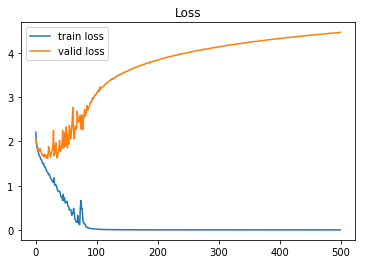

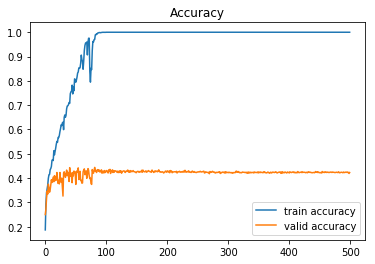

In [18]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()